In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
import plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

import keras
from keras import Sequential
import tensorflow as tf
from keras.layers import SimpleRNN
from keras import models
from keras import layers

from copy import copy

In [2]:
PHNag_df = pd.read_csv("PHN_aggregatd.csv", index_col = 0)

In [3]:
PHNss_df = pd.read_csv("X_data.csv")

In [4]:
PHNss_df.head()

,Unnamed: 0,V_myo(um3),V_SR(um3),V_myo_uL(uL),V_SR_uL(uL),i_NaK_max(uA),K_m_K(mM),K_m_Na(mM),K_o(millimolar),Na_o(millimolar),...,tau_R(ms),phi_R,theta_R,K_RyR(mM),K_L(mM),a,b,c,d,tau_s_ss
0,3,18087.633040,2971.250703,0.000033,0.000003,0.000103,1.634672,8.457044,6.694638,184.384591,...,2.491605,0.069589,0.008294,0.029984,0.000162,0.085792,19.130331,0.012273,123.013407,2.363106
1,4,35119.155518,2546.504451,0.000024,0.000001,0.000080,1.266706,7.810010,3.160808,112.247246,...,1.776488,0.073601,0.010835,0.037541,0.000160,0.069981,17.626720,0.009399,76.115827,2.312663
2,5,31723.880665,1163.450863,0.000018,0.000002,0.000052,1.955174,9.439872,3.730495,149.609915,...,3.528071,0.074748,0.007420,0.058981,0.000150,0.067458,11.149554,0.011840,87.480619,2.113083
3,6,17885.692846,3043.770618,0.000022,0.000003,0.000125,0.971169,6.645655,4.763852,74.651845,...,1.640167,0.068951,0.009030,0.042338,0.000288,0.093335,9.438720,0.013712,72.067875,2.977916
4,9,30331.086522,2278.322744,0.000038,0.000003,0.000069,1.539212,9.291735,2.934818,167.996222,...,1.859182,0.054088,0.007173,0.056029,0.000117,0.084184,20.728823,0.008027,102.415199,2.053384


In [5]:
PHNss_df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
PHNss_df.shape

(5344, 76)

In [7]:
 #PHNss_df  = PHNss_df.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 36, 38, 39, 40, 41, 42, 49, 55, 56, 57, 61, 62, 63, 64, 65, 67, 68, 69, 70, 75]]

In [8]:
PHNag_df

,n_ap,first_ap_time,first_ap_amp,first_ap_width
0,2,6,58.881427,13.620909
1,3,6,46.183495,7.132705
2,1,7,34.122383,8.834176
3,1,7,41.796535,4.948380
4,1,6,57.832149,52.102653
...,...,...,...,...
5339,2,7,42.798500,8.396907
5340,1,7,52.140596,73.301461
5341,1,7,46.796831,8.157181
5342,1,7,53.797265,16.934689


In [9]:
PHNn_ap_df = PHNag_df['n_ap']

In [10]:
PHNag_df = PHNag_df[['first_ap_time','first_ap_amp','first_ap_width']]

In [11]:
ag_indexes = ~pd.isna(PHNag_df).any(axis=1)

In [12]:
PHNss_ag_df = PHNss_df[ag_indexes]
PHNag_df  = PHNag_df [ag_indexes]
print(PHNss_ag_df.shape)
print(PHNag_df.shape)

(5344, 76)
(5344, 3)


In [13]:
PHNss_ag_df

,V_myo(um3),V_SR(um3),V_myo_uL(uL),V_SR_uL(uL),i_NaK_max(uA),K_m_K(mM),K_m_Na(mM),K_o(millimolar),Na_o(millimolar),Ca_TRPN_Max(mM),...,tau_R(ms),phi_R,theta_R,K_RyR(mM),K_L(mM),a,b,c,d,tau_s_ss
0,18087.633040,2971.250703,0.000033,0.000003,0.000103,1.634672,8.457044,6.694638,184.384591,0.083447,...,2.491605,0.069589,0.008294,0.029984,0.000162,0.085792,19.130331,0.012273,123.013407,2.363106
1,35119.155518,2546.504451,0.000024,0.000001,0.000080,1.266706,7.810010,3.160808,112.247246,0.101991,...,1.776488,0.073601,0.010835,0.037541,0.000160,0.069981,17.626720,0.009399,76.115827,2.312663
2,31723.880665,1163.450863,0.000018,0.000002,0.000052,1.955174,9.439872,3.730495,149.609915,0.088179,...,3.528071,0.074748,0.007420,0.058981,0.000150,0.067458,11.149554,0.011840,87.480619,2.113083
3,17885.692846,3043.770618,0.000022,0.000003,0.000125,0.971169,6.645655,4.763852,74.651845,0.069008,...,1.640167,0.068951,0.009030,0.042338,0.000288,0.093335,9.438720,0.013712,72.067875,2.977916
4,30331.086522,2278.322744,0.000038,0.000003,0.000069,1.539212,9.291735,2.934818,167.996222,0.103373,...,1.859182,0.054088,0.007173,0.056029,0.000117,0.084184,20.728823,0.008027,102.415199,2.053384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,29686.697458,1051.560825,0.000032,0.000003,0.000137,1.545477,12.402027,4.349500,168.432829,0.093633,...,3.196147,0.069653,0.008720,0.025202,0.000140,0.037697,11.516852,0.014368,139.310956,3.084144
5340,14571.354624,1386.516522,0.000020,0.000001,0.000096,1.321781,7.314302,5.223747,146.514228,0.091678,...,2.427242,0.070424,0.009969,0.055870,0.000264,0.073526,12.098269,0.014361,110.857333,1.108004
5341,32437.538891,2095.063478,0.000022,0.000003,0.000092,1.545330,8.810272,7.539690,207.497693,0.068950,...,3.502983,0.052886,0.009852,0.023352,0.000201,0.062598,19.120915,0.012294,77.995824,2.526280
5342,28460.428755,2809.654831,0.000015,0.000002,0.000115,1.331515,9.105736,7.301446,132.468385,0.087496,...,1.643484,0.057020,0.008370,0.027257,0.000214,0.043176,18.504241,0.013315,55.964035,1.410034


In [14]:
PHNag_df

,first_ap_time,first_ap_amp,first_ap_width
0,6,58.881427,13.620909
1,6,46.183495,7.132705
2,7,34.122383,8.834176
3,7,41.796535,4.948380
4,6,57.832149,52.102653
...,...,...,...
5339,7,42.798500,8.396907
5340,7,52.140596,73.301461
5341,7,46.796831,8.157181
5342,7,53.797265,16.934689


In [15]:
HHss_ag = PHNss_ag_df.values
HHag = PHNag_df .values

# Standardize and scale

In [16]:
X_Train, X_test, y_Train, y_test = train_test_split(HHss_ag,HHag,test_size=0.3,random_state=111)

In [17]:
scx = StandardScaler()
scy = StandardScaler()


X_Train = scx.fit_transform(X_Train)
y_Train = scy.fit_transform(y_Train)

X_test = scx.transform(X_test)
y_test = scy.transform(y_test)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_Train,y_Train,test_size=0.2,random_state=1234)

## Models train

In [19]:
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
  
  

In [20]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [21]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.00001)

In [22]:
callbacks = [callback,reduce_lr]

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [24]:

model1 = models.Sequential()
model1.add(layers.Dense(15, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(layers.Dense(y_train.shape[1]))
optimizer = keras.optimizers.Adam(lr=0.0001)
model1.compile(optimizer='adam', loss='mse', metrics=[r_square])

In [25]:
%%time
history1 = model1.fit(X_Train, y_Train,
                  epochs=500,
                  batch_size=64,
                  validation_data=(X_val, y_val), callbacks=[callbacks])

Epoch 1/500
59/59 [==============================] - 0s 3ms/step - loss: 1.8794 - r_square: -0.8897 - val_loss: 1.3634 - val_r_square: -0.4345
Epoch 2/500
59/59 [==============================] - 0s 2ms/step - loss: 1.1823 - r_square: -0.1931 - val_loss: 0.9849 - val_r_square: -0.0304
Epoch 3/500
59/59 [==============================] - 0s 1ms/step - loss: 0.9183 - r_square: 0.0778 - val_loss: 0.8001 - val_r_square: 0.1678
Epoch 4/500
59/59 [==============================] - 0s 1ms/step - loss: 0.7673 - r_square: 0.2316 - val_loss: 0.6822 - val_r_square: 0.2945
Epoch 5/500
59/59 [==============================] - 0s 1ms/step - loss: 0.6639 - r_square: 0.3379 - val_loss: 0.5980 - val_r_square: 0.3848
Epoch 6/500
59/59 [==============================] - 0s 1ms/step - loss: 0.5911 - r_square: 0.4078 - val_loss: 0.5392 - val_r_square: 0.4478
Epoch 7/500
59/59 [==============================] - 0s 1ms/step - loss: 0.5405 - r_square: 0.4608 - val_loss: 0.5009 - val_r_square: 0.4885
Epoch 8/5

Epoch 59/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2815 - r_square: 0.7199 - val_loss: 0.2680 - val_r_square: 0.7328
Epoch 60/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2801 - r_square: 0.7186 - val_loss: 0.2671 - val_r_square: 0.7337
Epoch 61/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2786 - r_square: 0.7211 - val_loss: 0.2662 - val_r_square: 0.7346
Epoch 62/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2779 - r_square: 0.7224 - val_loss: 0.2656 - val_r_square: 0.7350
Epoch 63/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2769 - r_square: 0.7243 - val_loss: 0.2645 - val_r_square: 0.7363
Epoch 64/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2755 - r_square: 0.7255 - val_loss: 0.2637 - val_r_square: 0.7370
Epoch 65/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2743 - r_square: 0.7265 - val_loss: 0.2637 - val_r_square: 0.7372
Epoch 

59/59 [==============================] - 0s 1ms/step - loss: 0.2485 - r_square: 0.7532 - val_loss: 0.2422 - val_r_square: 0.7585
Epoch 117/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2481 - r_square: 0.7519 - val_loss: 0.2407 - val_r_square: 0.7600
Epoch 118/500
59/59 [==============================] - 0s 927us/step - loss: 0.2478 - r_square: 0.7525 - val_loss: 0.2409 - val_r_square: 0.7597
Epoch 119/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2469 - r_square: 0.7537 - val_loss: 0.2399 - val_r_square: 0.7608
Epoch 120/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2470 - r_square: 0.7531 - val_loss: 0.2409 - val_r_square: 0.7598
Epoch 121/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2470 - r_square: 0.7532 - val_loss: 0.2406 - val_r_square: 0.7601
Epoch 122/500
59/59 [==============================] - 0s 834us/step - loss: 0.2460 - r_square: 0.7558 - val_loss: 0.2404 - val_r_square: 0.7602
Epoch 123

59/59 [==============================] - 0s 962us/step - loss: 0.2375 - r_square: 0.7597 - val_loss: 0.2388 - val_r_square: 0.7619
Epoch 174/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2375 - r_square: 0.7618 - val_loss: 0.2388 - val_r_square: 0.7620
Epoch 175/500
59/59 [==============================] - 0s 947us/step - loss: 0.2375 - r_square: 0.7635 - val_loss: 0.2388 - val_r_square: 0.7620
Epoch 176/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2375 - r_square: 0.7622 - val_loss: 0.2388 - val_r_square: 0.7620
Epoch 177/500
59/59 [==============================] - 0s 991us/step - loss: 0.2375 - r_square: 0.7621 - val_loss: 0.2388 - val_r_square: 0.7620
Epoch 178/500
59/59 [==============================] - 0s 986us/step - loss: 0.2375 - r_square: 0.7614 - val_loss: 0.2388 - val_r_square: 0.7620
Epoch 179/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2375 - r_square: 0.7630 - val_loss: 0.2388 - val_r_square: 0.7620
Epoch

Epoch 230/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2373 - r_square: 0.7631 - val_loss: 0.2386 - val_r_square: 0.7621
Epoch 231/500
59/59 [==============================] - 0s 975us/step - loss: 0.2373 - r_square: 0.7604 - val_loss: 0.2386 - val_r_square: 0.7621
Epoch 232/500
59/59 [==============================] - 0s 927us/step - loss: 0.2373 - r_square: 0.7620 - val_loss: 0.2386 - val_r_square: 0.7621
Epoch 233/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2373 - r_square: 0.7632 - val_loss: 0.2386 - val_r_square: 0.7621
Epoch 234/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2373 - r_square: 0.7616 - val_loss: 0.2386 - val_r_square: 0.7621
Epoch 235/500
59/59 [==============================] - 0s 991us/step - loss: 0.2373 - r_square: 0.7617 - val_loss: 0.2386 - val_r_square: 0.7621
Epoch 236/500
59/59 [==============================] - 0s 944us/step - loss: 0.2373 - r_square: 0.7601 - val_loss: 0.2386 - val_r_square

Epoch 287/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2371 - r_square: 0.7636 - val_loss: 0.2385 - val_r_square: 0.7622
Epoch 288/500
59/59 [==============================] - 0s 968us/step - loss: 0.2371 - r_square: 0.7625 - val_loss: 0.2385 - val_r_square: 0.7622
Epoch 289/500
59/59 [==============================] - 0s 948us/step - loss: 0.2371 - r_square: 0.7609 - val_loss: 0.2385 - val_r_square: 0.7622
Epoch 290/500
59/59 [==============================] - 0s 985us/step - loss: 0.2371 - r_square: 0.7631 - val_loss: 0.2385 - val_r_square: 0.7622
Epoch 291/500
59/59 [==============================] - 0s 954us/step - loss: 0.2371 - r_square: 0.7621 - val_loss: 0.2385 - val_r_square: 0.7622
Epoch 292/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2371 - r_square: 0.7617 - val_loss: 0.2385 - val_r_square: 0.7623
Epoch 293/500
59/59 [==============================] - 0s 985us/step - loss: 0.2371 - r_square: 0.7635 - val_loss: 0.2385 - val_r_squa

Epoch 344/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2369 - r_square: 0.7645 - val_loss: 0.2384 - val_r_square: 0.7623
Epoch 345/500
59/59 [==============================] - 0s 997us/step - loss: 0.2369 - r_square: 0.7638 - val_loss: 0.2384 - val_r_square: 0.7623
Epoch 346/500
59/59 [==============================] - 0s 964us/step - loss: 0.2369 - r_square: 0.7624 - val_loss: 0.2384 - val_r_square: 0.7623
Epoch 347/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2369 - r_square: 0.7630 - val_loss: 0.2384 - val_r_square: 0.7623
Epoch 348/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2369 - r_square: 0.7628 - val_loss: 0.2384 - val_r_square: 0.7623
Epoch 349/500
59/59 [==============================] - 0s 970us/step - loss: 0.2369 - r_square: 0.7616 - val_loss: 0.2384 - val_r_square: 0.7623
Epoch 350/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2369 - r_square: 0.7628 - val_loss: 0.2384 - val_r_square: 

Epoch 401/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2368 - r_square: 0.7636 - val_loss: 0.2383 - val_r_square: 0.7624
Epoch 402/500
59/59 [==============================] - 0s 997us/step - loss: 0.2368 - r_square: 0.7628 - val_loss: 0.2383 - val_r_square: 0.7624
Epoch 403/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2368 - r_square: 0.7656 - val_loss: 0.2383 - val_r_square: 0.7624
Epoch 404/500
59/59 [==============================] - 0s 976us/step - loss: 0.2368 - r_square: 0.7647 - val_loss: 0.2383 - val_r_square: 0.7624
Epoch 405/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2368 - r_square: 0.7632 - val_loss: 0.2383 - val_r_square: 0.7624
Epoch 406/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2368 - r_square: 0.7635 - val_loss: 0.2383 - val_r_square: 0.7624
Epoch 407/500
59/59 [==============================] - 0s 917us/step - loss: 0.2367 - r_square: 0.7624 - val_loss: 0.2383 - val_r_square: 

Epoch 458/500
59/59 [==============================] - 0s 928us/step - loss: 0.2366 - r_square: 0.7590 - val_loss: 0.2382 - val_r_square: 0.7626
Epoch 459/500
59/59 [==============================] - 0s 990us/step - loss: 0.2366 - r_square: 0.7626 - val_loss: 0.2382 - val_r_square: 0.7626
Epoch 460/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2366 - r_square: 0.7638 - val_loss: 0.2382 - val_r_square: 0.7626
Epoch 461/500
59/59 [==============================] - 0s 993us/step - loss: 0.2366 - r_square: 0.7644 - val_loss: 0.2382 - val_r_square: 0.7626
Epoch 462/500
59/59 [==============================] - 0s 962us/step - loss: 0.2366 - r_square: 0.7626 - val_loss: 0.2382 - val_r_square: 0.7626
Epoch 463/500
59/59 [==============================] - 0s 1ms/step - loss: 0.2366 - r_square: 0.7627 - val_loss: 0.2382 - val_r_square: 0.7626
Epoch 464/500
59/59 [==============================] - 0s 995us/step - loss: 0.2366 - r_square: 0.7645 - val_loss: 0.2382 - val_r_squa

Text(0.5, 0, 'Epochs')

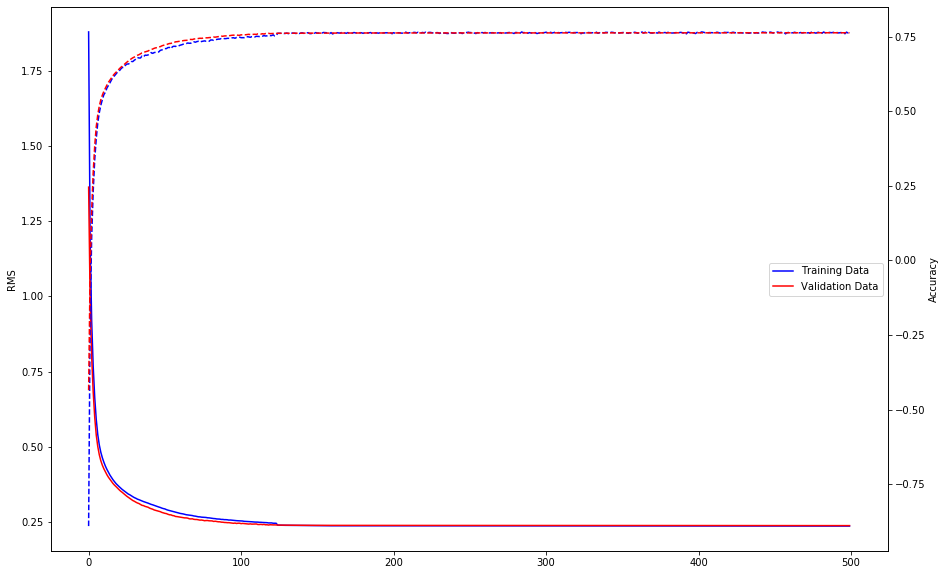

In [26]:
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(history1.history['loss'],label='Training Data',c='blue')
ax.plot(history1.history['val_loss'],label='Validation Data',c='red')
plt.ylabel('RMS')
plt.legend(loc='center right')

ax2 = ax.twinx()
ax2.plot(history1.history['r_square'],'--',c='blue')
ax2.plot(history1.history['val_r_square'],'--',c='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

In [27]:
results_df=pd.DataFrame()
ypred = model1.predict(X_test)

extra_results_df = pd.DataFrame([r2_score(y_test[:,i],ypred[:,i]) for i in range(3)],index=['first_ap_time','first_ap_amp','first_ap_width'],columns=['1500 epochs'])
results_df = pd.concat([results_df,extra_results_df],axis=1)
results_df

,1500 epochs
first_ap_time,0.673809
first_ap_amp,0.952132
first_ap_width,0.397221


ELI5

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

C:\Users\Ashesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Ashesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [29]:
def final_model():
    model2 = models.Sequential()
    model2.add(layers.Dense(15, activation='relu', input_shape=(X_train.shape[1],)))
    model2.add(layers.Dense(y_train.shape[1]))
    optimizer = keras.optimizers.Adam(lr=0.0001)
    model2.compile(optimizer='adam', loss='mse', metrics=[r_square])
    return model2

In [30]:
my_model = KerasRegressor(build_fn=final_model) 
my_model.fit(X_Train, y_Train,
                  epochs=231,
                  batch_size=64
                  )

Epoch 1/231
59/59 [==============================] - 0s 725us/step - loss: 1.8366 - r_square: -0.8653
Epoch 2/231
59/59 [==============================] - 0s 699us/step - loss: 1.1733 - r_square: -0.1841
Epoch 3/231
59/59 [==============================] - 0s 711us/step - loss: 0.9224 - r_square: 0.0716
Epoch 4/231
59/59 [==============================] - 0s 732us/step - loss: 0.7871 - r_square: 0.2035
Epoch 5/231
59/59 [==============================] - 0s 732us/step - loss: 0.6955 - r_square: 0.2982
Epoch 6/231
59/59 [==============================] - 0s 762us/step - loss: 0.6250 - r_square: 0.3735
Epoch 7/231
59/59 [==============================] - 0s 716us/step - loss: 0.5706 - r_square: 0.4273
Epoch 8/231
59/59 [==============================] - 0s 742us/step - loss: 0.5289 - r_square: 0.4691
Epoch 9/231
59/59 [==============================] - 0s 819us/step - loss: 0.4981 - r_square: 0.5021
Epoch 10/231
59/59 [==============================] - 0s 689us/step - loss: 0.4749 - r_sq

59/59 [==============================] - 0s 702us/step - loss: 0.2712 - r_square: 0.7271
Epoch 82/231
59/59 [==============================] - 0s 666us/step - loss: 0.2705 - r_square: 0.7300
Epoch 83/231
59/59 [==============================] - 0s 642us/step - loss: 0.2698 - r_square: 0.7292
Epoch 84/231
59/59 [==============================] - 0s 639us/step - loss: 0.2700 - r_square: 0.7281
Epoch 85/231
59/59 [==============================] - 0s 646us/step - loss: 0.2698 - r_square: 0.7304
Epoch 86/231
59/59 [==============================] - 0s 675us/step - loss: 0.2692 - r_square: 0.7276
Epoch 87/231
59/59 [==============================] - 0s 657us/step - loss: 0.2688 - r_square: 0.7294
Epoch 88/231
59/59 [==============================] - 0s 638us/step - loss: 0.2686 - r_square: 0.7315
Epoch 89/231
59/59 [==============================] - 0s 665us/step - loss: 0.2681 - r_square: 0.7336
Epoch 90/231
59/59 [==============================] - 0s 678us/step - loss: 0.2685 - r_square: 

59/59 [==============================] - 0s 662us/step - loss: 0.2528 - r_square: 0.7475
Epoch 161/231
59/59 [==============================] - 0s 699us/step - loss: 0.2526 - r_square: 0.7442
Epoch 162/231
59/59 [==============================] - 0s 689us/step - loss: 0.2530 - r_square: 0.7475
Epoch 163/231
59/59 [==============================] - 0s 655us/step - loss: 0.2523 - r_square: 0.7461
Epoch 164/231
59/59 [==============================] - 0s 652us/step - loss: 0.2513 - r_square: 0.7467
Epoch 165/231
59/59 [==============================] - 0s 662us/step - loss: 0.2520 - r_square: 0.7474
Epoch 166/231
59/59 [==============================] - 0s 628us/step - loss: 0.2518 - r_square: 0.7451
Epoch 167/231
59/59 [==============================] - 0s 652us/step - loss: 0.2517 - r_square: 0.7485
Epoch 168/231
59/59 [==============================] - 0s 670us/step - loss: 0.2506 - r_square: 0.7505
Epoch 169/231
59/59 [==============================] - 0s 654us/step - loss: 0.2506 - r

In [31]:
perm = PermutationImportance(my_model, random_state=101).fit(X_Train, y_Train,epochs=231,
                  batch_size=64) 

  1/117 [..............................] - ETA: 0s - loss: 0.1920 - r_square: 0.7650

W0305 10:31:36.362946 14756 callbacks.py:323] Callbacks method `on_test_batch_begin` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_begin` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2000 - r_square: 0.7552

W0305 10:31:37.709401 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.1948 - r_square: 0.7616

W0305 10:31:38.409522 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2010 - r_square: 0.7540

W0305 10:31:38.823939 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2004 - r_square: 0.7548

W0305 10:31:38.927847 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.1905 - r_square: 0.7668

W0305 10:31:41.303124 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.1947 - r_square: 0.7617

W0305 10:31:41.507913 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.4790 - r_square: 0.4138

W0305 10:31:43.241085 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2099 - r_square: 0.7431

W0305 10:31:43.713953 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2142 - r_square: 0.7379

W0305 10:31:43.817121 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.1994 - r_square: 0.7560

W0305 10:31:44.009965 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2065 - r_square: 0.7473

W0305 10:31:44.672580 14756 callbacks.py:323] Callbacks method `on_test_batch_begin` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_begin` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.1911 - r_square: 0.7662

W0305 10:31:45.329749 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2109 - r_square: 0.7419

W0305 10:31:45.895823 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2160 - r_square: 0.7357

W0305 10:31:46.183243 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.1988 - r_square: 0.7567

W0305 10:31:46.374560 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.1972 - r_square: 0.7587

W0305 10:31:46.467082 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2029 - r_square: 0.7517

W0305 10:31:46.752571 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2001 - r_square: 0.7551

W0305 10:31:47.520644 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2342 - r_square: 0.7133

W0305 10:31:48.180960 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2026 - r_square: 0.7520

W0305 10:31:49.892792 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2776 - r_square: 0.6603

W0305 10:31:51.697566 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.1949 - r_square: 0.7615

W0305 10:31:52.463909 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2101 - r_square: 0.7429

W0305 10:31:54.157931 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.1977 - r_square: 0.7580

W0305 10:31:55.089944 14756 callbacks.py:323] Callbacks method `on_test_batch_begin` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_begin` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2067 - r_square: 0.7470

W0305 10:31:56.501710 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2816 - r_square: 0.6553

W0305 10:31:56.692262 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.3052 - r_square: 0.6265

W0305 10:31:57.732207 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0009s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2332 - r_square: 0.7146

W0305 10:31:58.111707 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2002 - r_square: 0.7550

W0305 10:31:58.684168 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.1874 - r_square: 0.7706

W0305 10:32:00.845498 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2017 - r_square: 0.7531

W0305 10:32:01.695686 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2018 - r_square: 0.7530

W0305 10:32:02.337561 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2048 - r_square: 0.7494

W0305 10:32:02.717476 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.1983 - r_square: 0.7574

W0305 10:32:04.127113 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2549 - r_square: 0.6880

W0305 10:32:04.503089 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.5608 - r_square: 0.3137

W0305 10:32:04.794702 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2155 - r_square: 0.7362

W0305 10:32:05.262039 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2539 - r_square: 0.6892

W0305 10:32:05.927048 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2015 - r_square: 0.7535

W0305 10:32:06.588805 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2007 - r_square: 0.7544

W0305 10:32:07.531694 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.1974 - r_square: 0.7584

W0305 10:32:08.383062 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2095 - r_square: 0.7436

W0305 10:32:08.670924 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2023 - r_square: 0.7525

W0305 10:32:08.771793 14756 callbacks.py:323] Callbacks method `on_test_batch_begin` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_begin` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.1980 - r_square: 0.7577

W0305 10:32:08.868960 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.1834 - r_square: 0.7755

W0305 10:32:08.964485 14756 callbacks.py:323] Callbacks method `on_test_batch_begin` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_begin` time: 0.0010s). Check your callbacks.


  1/117 [..............................] - ETA: 0s - loss: 0.2578 - r_square: 0.6845

W0305 10:32:09.816641 14756 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


117/117 [==============================] - 0s 507us/step - loss: 0.2358 - r_square: 0.7605


In [32]:
eli5.explain_weights(perm, feature_names=PHNss_df.columns.to_list(),top=76)

Weight,Feature
0.4397 ± 0.0104,g_Na(microS)
0.3754 ± 0.0088,Na_o(millimolar)
0.1630 ± 0.0058,g_t(microS)
0.0850 ± 0.0064,V_myo_uL(uL)
0.0824 ± 0.0061,g_D(um3_per_ms)
0.0810 ± 0.0026,a_endo
0.0806 ± 0.0037,del_VL(mV)
0.0682 ± 0.0051,N
0.0648 ± 0.0065,K_RyR(mM)
0.0576 ± 0.0030,V_myo(um3)


# Permuted feature importance

In [33]:
target = PHNag_df.columns

In [34]:
from copy import copy

def Permuted_feature_impotance(_X,y,model,seeds=[234]):
  
  base_yhat = model.predict(_X)
  base_line = np.array(
      [mean_squared_error(y[:,c],base_yhat[:,c])
       for c in range(base_yhat.shape[1])])
  
  PFI = np.zeros((len(seeds),_X.shape[1],y.shape[1]))
  
  for i,seed in enumerate(seeds):
    
    np.random.RandomState(seed) # Sets the random state for numpy
    for j in range(X_test.shape[1]):
      
      X = copy(_X)
      X[:,j] = np.random.permutation(X[:,j])

      perm_yhat = model.predict(X)
      



      FI_perm = np.array([mean_squared_error(y[:,c],perm_yhat[:,c]) for c in range(perm_yhat.shape[1])])
      PFI[i,j,:] = FI_perm - base_line
  
  return PFI


In [35]:
%%time
seeds = [123*i for i in range(1,5)]
PFI = Permuted_feature_impotance(X_test,y_test,model1,seeds)

Wall time: 13.1 s


In [36]:
PFI.shape

(4, 76, 3)

In [37]:
PHNss_df.columns

Index(['V_myo(um3)', 'V_SR(um3)', 'V_myo_uL(uL)', 'V_SR_uL(uL)',
       'i_NaK_max(uA)', 'K_m_K(mM)', 'K_m_Na(mM)', 'K_o(millimolar)',
       'Na_o(millimolar)', 'Ca_TRPN_Max(mM)', 'g_Na(microS)', 'g_t(microS)',
       'a_endo', 'b_endo', 'g_ss(microS)', 'g_K1(microS)', 'g_f(microS)',
       'f_Na', 'g_B_Na(microS)', 'g_B_Ca(microS)', 'g_B_K(microS)',
       'E_Ca(millivolt)', 'Ca_o(millimolar)', 'g_D(um3_per_ms)',
       'J_R(um3_per_ms)', 'J_L(um3_per_ms)', 'N', 'K_mNa(mM)', 'K_mCa(mM)',
       'eta', 'k_sat', 'g_NCX(mM_per_ms)', 'g_SERCA(mM_per_ms)', 'K_SERCA(mM)',
       'g_pCa(mM_per_ms)', 'K_mpCa(mM)', 'g_CaB(mM_per_mV_ms)',
       'g_SRl(per_ms)', 'k_CMDN(mM)', 'B_CMDN(mM)', 'k_on(per_mM_per_ms)',
       'k_Ref_off(per_ms)', 'gamma_trpn', 'alpha_0(per_ms)',
       'alpha_r1(per_ms)', 'alpha_r2(per_ms)', 'n_Rel', 'K_z', 'n_Hill',
       'Ca_50ref(mM)', 'z_p', 'beta_1', 'beta_0', 'T_ref(N_per_mm2)',
       'a in component Cross_Bridges', 'A_1', 'A_2', 'A_3', 'alpha_1(per_ms)',
   

In [38]:
names = ['V_myo(um3)', 'V_SR(um3)', 'V_myo_uL(uL)', 'V_SR_uL(uL)',
       'i_NaK_max(uA)', 'K_m_K(mM)', 'K_m_Na(mM)', 'K_o(millimolar)',
       'Na_o(millimolar)', 'Ca_TRPN_Max(mM)', 'g_Na(microS)', 'g_t(microS)',
       'a_endo', 'b_endo', 'g_ss(microS)', 'g_K1(microS)', 'g_f(microS)',
       'f_Na', 'g_B_Na(microS)', 'g_B_Ca(microS)', 'g_B_K(microS)',
       'E_Ca(millivolt)', 'Ca_o(millimolar)', 'g_D(um3_per_ms)',
       'J_R(um3_per_ms)', 'J_L(um3_per_ms)', 'N', 'K_mNa(mM)', 'K_mCa(mM)',
       'eta', 'k_sat', 'g_NCX(mM_per_ms)', 'g_SERCA(mM_per_ms)', 'K_SERCA(mM)',
       'g_pCa(mM_per_ms)', 'K_mpCa(mM)', 'g_CaB(mM_per_mV_ms)',
       'g_SRl(per_ms)', 'k_CMDN(mM)', 'B_CMDN(mM)', 'k_on(per_mM_per_ms)',
       'k_Ref_off(per_ms)', 'gamma_trpn', 'alpha_0(per_ms)',
       'alpha_r1(per_ms)', 'alpha_r2(per_ms)', 'n_Rel', 'K_z', 'n_Hill',
       'Ca_50ref(mM)', 'z_p', 'beta_1', 'beta_0', 'T_ref(N_per_mm2)',
       'a in component Cross_Bridges', 'A_1', 'A_2', 'A_3', 'alpha_1(per_ms)',
       'alpha_2(per_ms)', 'alpha_3(per_ms)', 'V_L(mV)', 'del_VL(mV)', 'phi_L',
       't_L(ms)', 'tau_L(ms)', 'tau_R(ms)', 'phi_R', 'theta_R', 'K_RyR(mM)',
       'K_L(mM)', 'a', 'b', 'c', 'd', 'tau_s_ss']

In [39]:
m = np.mean(PFI,axis=0)


In [40]:
m.shape

(76, 3)

In [41]:
pd.DataFrame(m)

,0,1,2
0,0.012410,0.038179,0.061386
1,0.002608,-0.000128,-0.002080
2,0.041182,0.035483,0.123951
3,-0.001852,0.000007,0.024439
4,0.008279,0.000378,-0.000870
...,...,...,...
71,0.000068,-0.000038,-0.000678
72,0.000482,0.000119,0.001378
73,0.000314,-0.000035,-0.004915
74,-0.001261,0.000063,0.000043


In [42]:
# plt.figure(figsize=(15,8))
# plt.bar(names,m[:,0])
# plt.xticks(rotation='vertical');
# ax = plt.gca()
# for tick in ax.xaxis.get_major_ticks():
#     tick.label1.set_fontsize(15)
#     tick.label1.set_fontweight('bold')
# plt.title(target[0])
# plt.tight_layout()

In [43]:
# plt.figure(figsize=(15,8))
# plt.bar(names,m[:,1])
# plt.xticks(rotation='vertical');
# ax = plt.gca()
# for tick in ax.xaxis.get_major_ticks():
#     tick.label1.set_fontsize(15)
#     tick.label1.set_fontweight('bold')
# plt.title(target[1])

In [44]:
# plt.figure(figsize=(15,8))
# plt.bar(names,m[:,2])
# plt.xticks(rotation='vertical');
# ax = plt.gca()
# for tick in ax.xaxis.get_major_ticks():
#     tick.label1.set_fontsize(15)
#     tick.label1.set_fontweight('bold')
# plt.title(target[2])

In [45]:
target

Index(['first_ap_time', 'first_ap_amp', 'first_ap_width'], dtype='object')

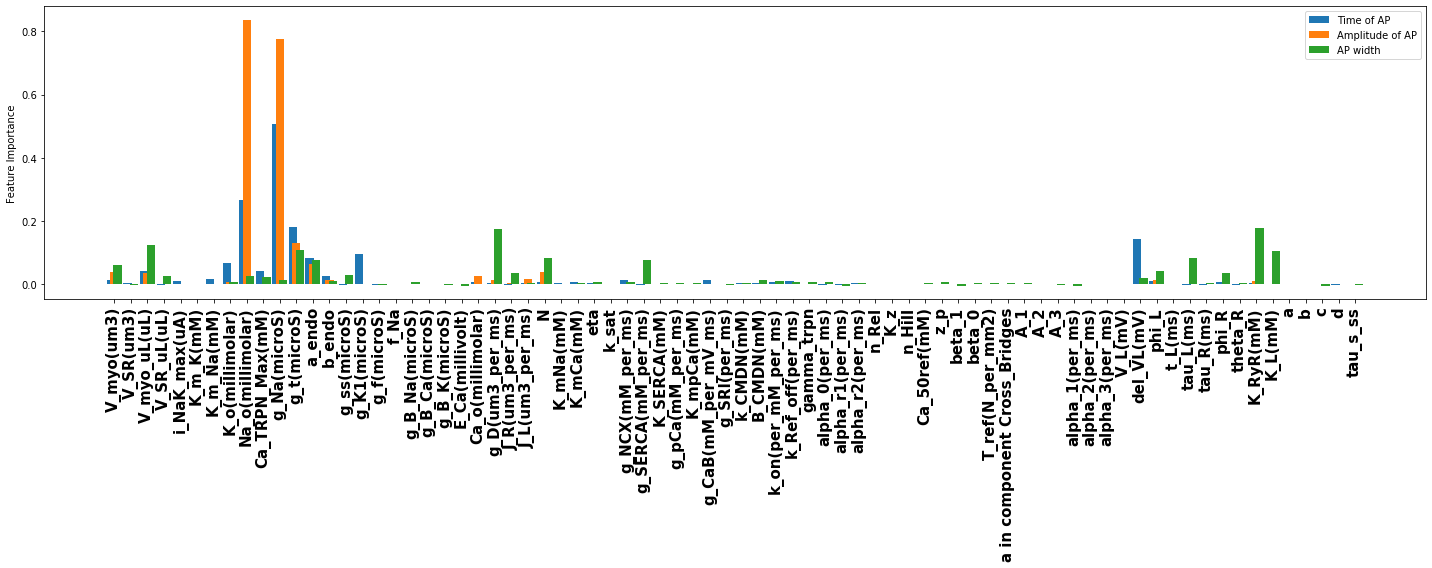

In [46]:
plt.figure(figsize=(20,8))
xa = np.array([i for i in range(len(names))])
plt.bar(xa-0.2,m[:,0],width=0.5)
plt.bar(xa,m[:,1],width=0.5)
plt.bar(xa+0.2,m[:,2],width=0.5)
plt.legend(['Time of AP','Amplitude of AP','AP width'])

plt.xticks(xa,names,fontsize=15,fontweight='bold')
plt.xticks(rotation='vertical');
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
plt.ylabel('Feature Importance')
plt.tight_layout()
#plt.savefig("drive/My Drive/Figures/R2plots/HHperm_ag")

In [47]:
df = pd.DataFrame(m)

In [48]:
df.drop(df.index[[27,28,29,30,16,17,18,19,20,21,33,34,35,36,37,38,39,40,41,42,43,44,45,46,64,47,48,49,50,51,52,53,66,68,54,55,56,57,58,59,60,61,71,72,73,74,75]], inplace=True)

In [49]:
df.shape

(29, 3)

In [50]:
p = df.to_numpy()

In [51]:
 names = ['V_myo(um3)', 'V_SR(um3)', 'V_myo_uL(uL)', 'V_SR_uL(uL)',
       'i_NaK_max(uA)', 'K_m_K(mM)', 'K_m_Na(mM)', 'K_o(millimolar)',
       'Na_o(millimolar)', 'Ca_TRPN_Max(mM)', 'g_Na(microS)', 'g_t(microS)',
       'a_endo', 'b_endo', 'g_ss(microS)', 'g_K1(microS)', 'Ca_o(millimolar)', 'g_D(um3_per_ms)',
       'J_R(um3_per_ms)', 'J_L(um3_per_ms)', 'N', 'g_NCX(mM_per_ms)', 'g_SERCA(mM_per_ms)', 'del_VL(mV)', 'phi_L',
        'tau_L(ms)', 'phi_R',  'K_RyR(mM)',
       'K_L(mM)']

In [52]:
p.shape

(29, 3)

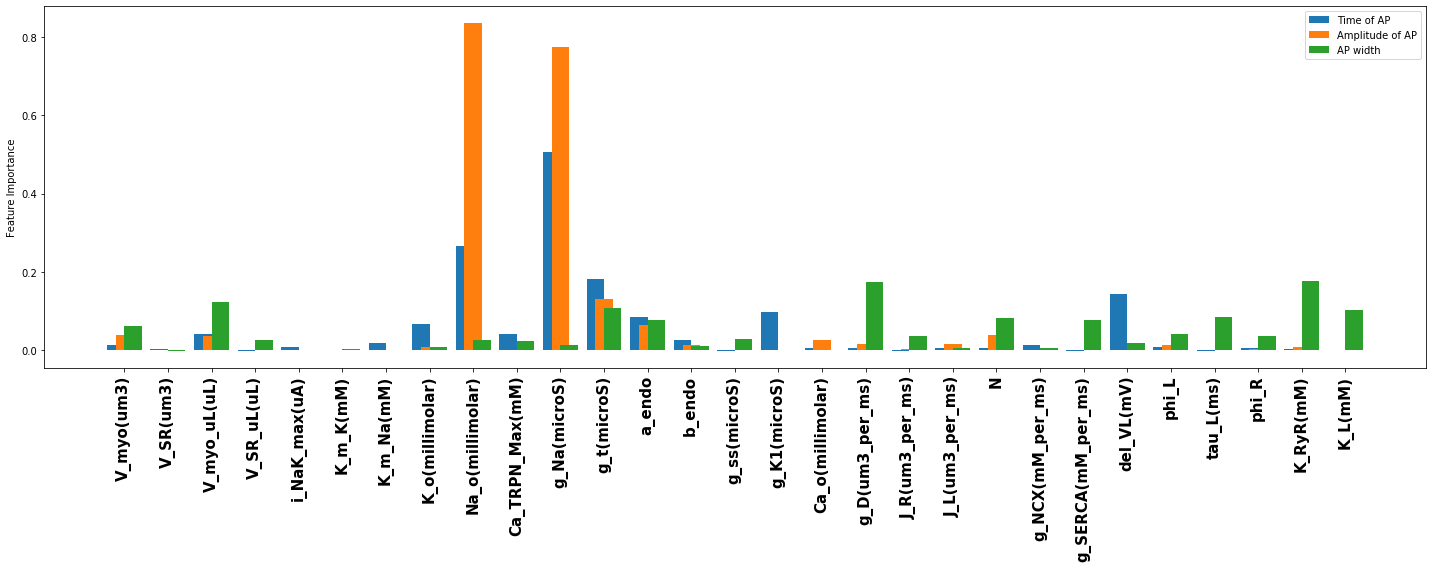

In [53]:
plt.figure(figsize=(20,8))
xa = np.array([i for i in range(len(names))])
plt.bar(xa-0.2,p[:,0],width=0.4)
plt.bar(xa,p[:,1],width=0.4)
plt.bar(xa+0.2,p[:,2],width=0.4)
plt.legend(['Time of AP','Amplitude of AP','AP width'])

plt.xticks(xa,names,fontsize=15,fontweight='bold')
plt.xticks(rotation='vertical');
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
plt.ylabel('Feature Importance')
plt.tight_layout()